[View in Colaboratory](https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part1/S04_Exercise4.ipynb)

# S04 Exercise 4

>[S04 Exercise 4](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=sfeRgdGRjKgd)

>>[Import the needed libraries](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=RY5dtpZujZ6v)

>>[Define the constants](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=VU6WqUW6jfCi)

>>[Balances](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=y_1FinyVkDLZ)

>>[Solution for the membrane reactor](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=IGaVqRZ9o39_)

>>>[Initial condition and integration range](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=2mKwJGdDqlqr)

>>>[Call to the solver](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=TQlWI9Szqpk9)

>>>[Post-processing to compute concentrations](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=8UiE9eT4qs4j)

>>>[Visualization](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=8nD-4_8FqxwH)

>>[Solution for the plug-flow reactor](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=4ZniR1TGpBoP)

>>>[Redefinition of some constants](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=NbGs4pRmq4sZ)

>>>[Initial conditions and integration range](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=YUzxgKg-rG4t)

>>>[Call to the solver](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=pFXhC2SWrNOX)

>>>[Post-processing to calculate the concentrations](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=ytEFxNPrrQFj)

>>>[Visualizations](#updateTitle=true&folderId=1zTjeYiZPECOgfYlQyyVHunIHEcdpZWyG&scrollTo=qnw8l7b0rUai)



## Import the needed libraries

In [0]:
# vectors and linear algebra
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# solvers to integrate ordinary differential equations
import scipy.integrate as solvers

## Define the constants

In [0]:
k1 = 2 # L2/mol2*s
k2 = 3 # L2/mol2*s

CT0 = 0.8 # % mol/L
Vtot = 50 # % L
FA0 = 4 # mol/s
FB0 = 0 # mol/s
FD0 = 0 # mol/s
FU0 = 0 # mol/s

FBM = 4 # mol/s
RBM = FBM / Vtot # mol/L*s



## Balances

In [0]:
def balances(variables, V, k1, k2, CT0, RBM):
    FA, FB, FD, FU = variables
    
    Ftot = FA + FB + FD + FU;

    # Since p & T are constant, Ctot = p/RT = CT0 = constant
    CA = CT0 * FA / Ftot
    CB = CT0 * FB / Ftot
    CD = CT0 * FD / Ftot
    CU = CT0 * FU / Ftot

    # Rates of reaction
    r1 = k1 * CA**2 * CB
    r2 = k2 * CA * CB**2

    # Rates of transformation
    RA = -r1 - r2
    RB = -r1 - r2
    RD = r1
    RU = r2

    # Material balances
    dFA = RA
    dFB = RB + RBM
    dFD = RD
    dFU = RU

    return dFA, dFB, dFD, dFU

## Solution for the membrane reactor

### Initial condition and integration range

In [0]:
initial_conditions = [FA0, FB0, FD0, FU0]

In [0]:
V = np.linspace(0, Vtot, 4*Vtot+1)

### Call to the solver

In [0]:
results = solvers.odeint(
    balances, 
    initial_conditions, 
    V, 
    (k1, k2, CT0, RBM)
)

### Post-processing to compute concentrations

In [0]:
FA = results[:,0]
FB = results[:,1]
FD = results[:,2]
FU = results[:,3]

Ftot = FA + FB + FD + FU

CA = CT0 * FA / Ftot
CB = CT0 * FB / Ftot
CD = CT0 * FD / Ftot
CU = CT0 * FU / Ftot

### Visualization

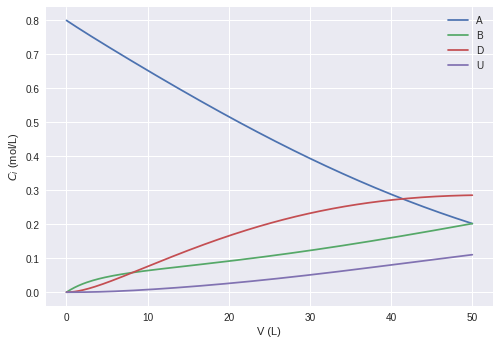

In [8]:
plt.plot(V, CA, V, CB, V, CD, V, CU)
plt.xlabel('V (L)')
plt.ylabel('$C_{i}$ (mol/L)')
plt.legend(['A', 'B', 'D', 'U'])
plt.show()

In [0]:
S_DU_MR = FD[FU > 0] / FU[FU > 0]

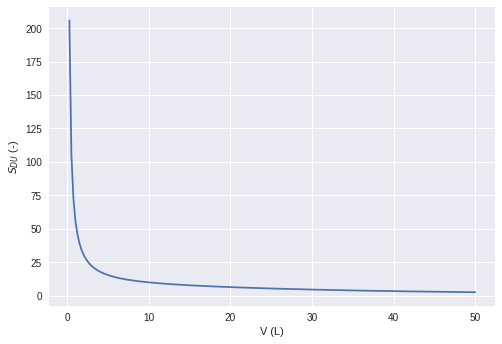

In [10]:
plt.plot(V[FU > 0], S_DU_MR)
plt.xlabel('V (L)')
plt.ylabel('$S_{DU}$ (-)')
plt.show()

## Solution for the plug-flow reactor

### Redefinition of some constants

In [0]:
FA0 = 4 # mol/s
FB0 = 4 # mol/s
FD0 = 0 # mol/s
FU0 = 0 # mol/s
RBM = 0 # mol/L*s No feed any more through the side of the tube

### Initial conditions and integration range

In [0]:
initial_conditions = [FA0, FB0, FD0, FU0]

In [0]:
V = np.linspace(0, Vtot, 4*Vtot+1)

### Call to the solver

In [0]:
results = solvers.odeint(
    balances, 
    initial_conditions, 
    V, 
    (k1, k2, CT0, RBM)
)

### Post-processing to calculate the concentrations

In [0]:
FA = results[:,0]
FB = results[:,1]
FD = results[:,2]
FU = results[:,3]

Ftot = FA + FB + FD + FU

CA = CT0 * FA / Ftot
CB = CT0 * FB / Ftot
CD = CT0 * FD / Ftot
CU = CT0 * FU / Ftot

### Visualizations

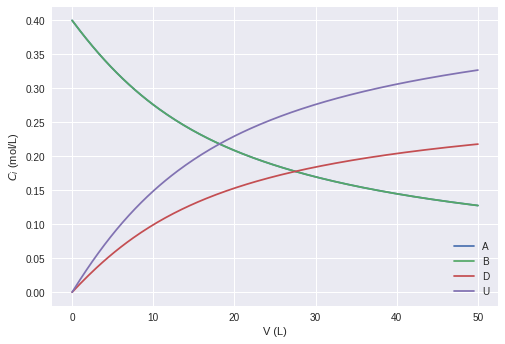

In [16]:
plt.plot(V, CA, V, CB, V, CD, V, CU)
plt.xlabel('V (L)')
plt.ylabel('$C_{i}$ (mol/L)')
plt.legend(['A', 'B', 'D', 'U'])
plt.show()

In [0]:
S_DU_PFR = FD[FU > 0] / FU[FU > 0]

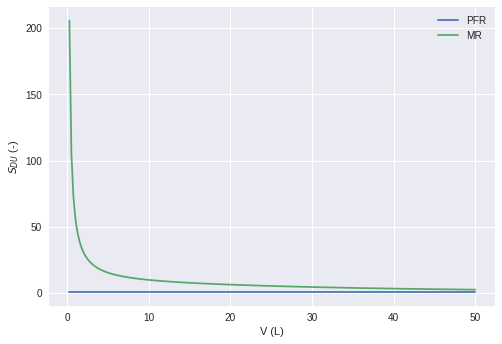

In [18]:
plt.plot(V[FU > 0], S_DU_PFR, V[FU > 0], S_DU_MR)
plt.xlabel('V (L)')
plt.ylabel('$S_{DU}$ (-)')
plt.legend(['PFR', 'MR'])
plt.show()